# Unit 5 - Financial Planning

In [41]:
# Initial imports
import os

import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [42]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [43]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [44]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [45]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url = btc_url + "?format=json"
requests.get(btc_url)
btc_data = requests.get(btc_url)

btc_content = btc_data.content

btc = btc_data.json()

import json
print(json.dumps(btc, indent=4))



{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19124331,
            "total_supply": 19124331,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 23470.0,
                    "volume_24h": 28942210013,
                    "market_cap": 448886189577,
                    "percentage_change_1h": 0.344495334154177,
                    "percentage_change_24h": -2.30273772228474,
                    "percentage_change_7d": -2.00020167305758,
                    "percent_change_1h": 0.344495334154177,
                    "percent_change_24h": -2.30273772228474,
                    "percent_change_7d": -2.00020167305758
                }
            },
            "last_updated": 1660784588
        }
    },
    "metadata": {
        "timestamp": 1660784588,
        "num_cry

In [46]:
# Fetch current ETH price
# YOUR CODE HERE!
eth_url = eth_url + "?format=json"
requests.get(eth_url)
eth_data = requests.get(eth_url)

eth_content = eth_data.content

eth = eth_data.json()

print(json.dumps(eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120140395,
            "total_supply": 120140395,
            "max_supply": 120140160,
            "quotes": {
                "USD": {
                    "price": 1848.79,
                    "volume_24h": 18638786838,
                    "market_cap": 222101537113,
                    "percentage_change_1h": 0.571112530268793,
                    "percentage_change_24h": -2.49187721866789,
                    "percentage_change_7d": -0.220880981692495,
                    "percent_change_1h": 0.571112530268793,
                    "percent_change_24h": -2.49187721866789,
                    "percent_change_7d": -0.220880981692495
                }
            },
            "last_updated": 1660784679
        }
    },
    "metadata": {
        "timestamp": 1660784679,
   

In [47]:
#print(btc)
#print(eth)

# YOUR CODE HERE!
my_btc_value = btc['data']['1']['quotes']['USD']['price']
my_eth_value = eth['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
bit_value = my_btc_value * my_btc
eth_value = my_eth_value * my_eth
tot_crypto_val = bit_value + eth_value
# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${bit_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $28164.00
The current value of your 5.3 ETH is $9798.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [48]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [49]:
#set tickers
tickers = ["AGG", "SPY"]
#set current shares data 
shares_data = {
    'shares': [200, 50]
}
#create the shares dataframe 
df_shares = pd.DataFrame(shares_data, index=tickers)
#diplay
df_shares

,shares
AGG,200
SPY,50


In [50]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_sk = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_key, alpaca_sk, api_version='v2')

In [51]:
#verify that alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_sk)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [52]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-08-12", tz="America/New_York").isoformat()
# Set the tickers


# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"



In [53]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_port = alpaca.get_bars(tickers, timeframe, start = today, end = today).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_port[df_port['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_port[df_port['symbol']=='SPY'].drop('symbol', axis=1)
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_port = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
# Preview DataFrame
# YOUR CODE HERE!
df_port.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-08-12 04:00:00+00:00  102.97  103.12  102.72  103.12  3628312   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2022-08-12 04:00:00+00:00       16069  102.954114  422.1  427.21  421.03   

                                                                    
                           close    volume trade_count        vwap  
timestamp                                                           
2022-08-12 04:00:00+00:00  427.1  61456095      396459  424.557629

In [54]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_port['AGG']['close'])
spy_close_price = float(df_port['SPY']['close'])
                        
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.12
Current SPY closing price: $427.1


In [55]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21355.00
The current value of your 200 AGG shares is $20624.00


### Savings Health Analysis

In [16]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
total_shares = my_spy_value + my_agg_value
# YOUR CODE HERE!
data = {'Amount': [tot_crypto_val, total_shares]}
assets = ['Shares', 'Crypto']
# Create savings DataFrame


# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index=assets)
    
# Display savings DataFrame

display(df_savings)


,Amount
Shares,37962.587
Crypto,41979.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

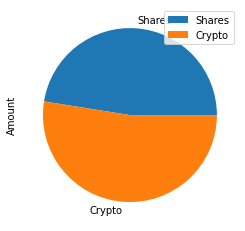

In [17]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True)

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
tot_saving = total_shares + tot_crypto_val
print(f"Your overall savings is: {tot_saving:0.2f}.")

    
        
# Validate saving health
if tot_saving > emergency_fund:
        print("Congratulations! you have enough money in your savings! You can start allocating your extra assets!")
        
elif tot_savings == emergency_fund:
        print("Congratulations! You have met your financial goal!")
        
elif tot_savings < emergency_fund: 
        print(f"You should continue saving you are: {(emergency_fund - tot_saving):0.2f}.")
# YOUR CODE HERE!

Your overall savings is: 79941.59.
Congratulations! you have enough money in your savings! You can start allocating your extra assets!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.73  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.88  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.77  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.68  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.70  1421843   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00       11008  108.743679  238.66  239.1700  238.195   
2017-05-02 04:00:00+00:00        9263  108.831870  238.82  238.9800  238.300   
2017-05-03 04:00:00+00:00       10987  108.902870  238.29  238.8775  237.700   
2017-05-04 04:00:00+00:00        7501  108.629678  238.81  238.9225  237.780   
2017-05-05 04:00:00+00:00        7385  108.675918  239.16  239.7200  238.680   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-05-01 04:00:00+00:00  238.68  66882521      180740  238.682276  
2017-05-02 04:00:00+00:00  238.77  57375732      176648  238.630973  
2017-05-03 04:00:00+00:00  238.48  73137731      223568  238.418100  
2017-05-04 04:00:00+00:00  238.76  61462732      208872  238.541805  
2017-05-05 04:00:00+00:00  239.70  62001269      204885  239.253410

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
sims = 500

In [22]:
# Printing the simulation input data
# YOUR CODE HERE!
Monte_df = MCSimulation(portfolio_data = df_stock_data, weights = [.6, .4], num_simulation=sims, num_trading_days=252*30)

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
Monte_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomaspalmisano/Desktop/FinTech_ASU/APIs_Hw/Financial_Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995810,0.997150,1.000131,1.003812,1.004483,1.001933,1.000855,1.001987,0.991022,1.003451,...,0.994585,1.002370,0.999962,1.002517,0.997574,1.004854,0.996443,1.001114,1.002882,0.996766
2,0.991567,0.998963,1.002893,0.994437,0.999344,1.005680,0.994743,0.995830,0.990760,0.998407,...,1.002683,1.002115,1.005044,1.003490,1.005340,1.000828,0.988622,1.002935,1.004050,1.007691
3,0.983421,0.994973,1.002386,0.994519,1.009656,1.000195,0.997625,0.996652,0.987573,1.000952,...,0.998095,0.997816,1.005654,0.997150,1.018997,1.002755,0.993578,1.002367,1.007518,1.017992
4,0.990329,1.000962,1.004205,1.000625,1.015658,0.998733,1.002785,1.010652,0.982887,0.997108,...,1.000560,0.999277,1.004500,0.993026,1.018943,1.007840,0.987493,1.004271,1.006194,1.020941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.643163,1.985040,8.847890,4.699992,2.706653,5.908430,1.394543,3.027778,2.578143,3.926530,...,4.998994,4.157369,1.563194,4.283939,3.776555,1.892236,3.228637,3.678197,4.768570,2.957574
7557,2.648086,2.004341,8.821125,4.687387,2.702704,5.912468,1.389903,3.010105,2.577098,3.924437,...,4.995147,4.121998,1.564136,4.311647,3.742028,1.892975,3.234640,3.681794,4.753409,2.940869
7558,2.638053,1.986298,8.781153,4.694233,2.718291,5.900177,1.391877,3.014306,2.570773,3.975252,...,5.005018,4.134071,1.575217,4.301733,3.747159,1.899046,3.245714,3.698258,4.720232,2.948415
7559,2.623964,1.990806,8.838853,4.684008,2.731798,5.908632,1.383598,3.009753,2.576608,3.978663,...,5.039495,4.128451,1.570965,4.289958,3.732933,1.860410,3.210850,3.674376,4.717127,2.953671


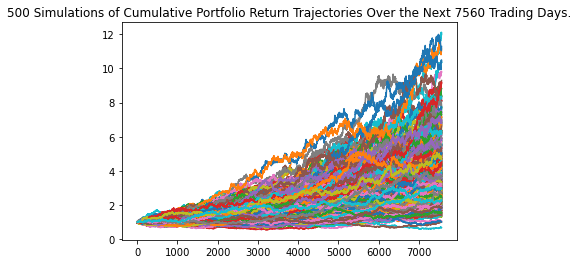

In [24]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = Monte_df.plot_simulation()

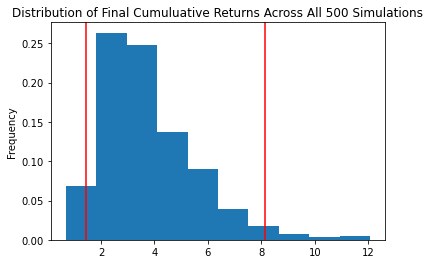

In [25]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
plot_60_40 = Monte_df.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_table1 = Monte_df.summarize_cumulative_return()

sim_return_data = { 
    'mean': list(Monte_df.simulated_return.mean(axis=1)),
    'median': list(Monte_df.simulated_return.median(axis=1)),
    'min': list(Monte_df.simulated_return.min(axis=1)),
    'max': list(Monte_df.simulated_return.max(axis=1))}
# Print summary statistics
# YOUR CODE HERE!
sim_return_df = pd.DataFrame(sim_return_data)

print(sum_table1)

count           500.000000
mean              3.801062
std               1.785158
min               0.683852
25%               2.557609
50%               3.440125
75%               4.676723
max              12.068481
95% CI Lower      1.423543
95% CI Upper      8.120071
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(sum_table1[8]*20000,2)
ci_upper = round(sum_table1[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28470.86 and $162401.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(sum_table1[8]*20000,2)
ci_upper = round(sum_table1[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28470.86 and $162401.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
sims = 500

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
Monte_early = MCSimulation(portfolio_data = df_stock_data, weights = [.6, .4], num_simulation=sims, num_trading_days=252*5)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomaspalmisano/Desktop/FinTech_ASU/APIs_Hw/Financial_Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

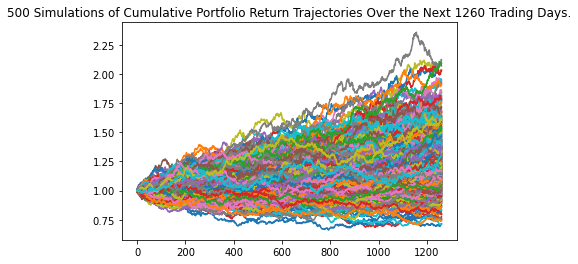

In [31]:
# Plot simulation outcomes
# YOUR CODE HERE!
early_plot = Monte_early.plot_simulation()

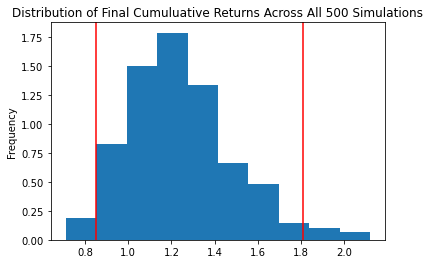

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
early_dist = Monte_early.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_table2 = Monte_early.summarize_cumulative_return()

sim_return_data_2 = { 
    'mean': list(Monte_early.simulated_return.mean(axis=1)),
    'median': list(Monte_early.simulated_return.median(axis=1)),
    'min': list(Monte_early.simulated_return.min(axis=1)),
    'max': list(Monte_early.simulated_return.max(axis=1))}
# Print summary statistics
# YOUR CODE HERE!
sim_return_2_df = pd.DataFrame(sim_return_data_2)

print(sum_table2)

count           500.000000
mean              1.242229
std               0.244067
min               0.710681
25%               1.073099
50%               1.207677
75%               1.374994
max               2.119900
95% CI Lower      0.849068
95% CI Upper      1.810226
Name: 1260, dtype: float64


In [34]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_early = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_five = round(sum_table2[8]*60000,2)
ci_lower_five = round(sum_table2[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_early} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $108613.53 and $50944.07


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
Monte_early_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.6, .4], num_simulation=sims, num_trading_days=252*10)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
Monte_early_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomaspalmisano/Desktop/FinTech_ASU/APIs_Hw/Financial_Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003082,0.993916,1.002102,1.000963,1.000377,0.995929,1.008321,0.992979,1.002631,1.001939,...,0.991248,1.005052,1.005306,1.001665,1.003073,1.002625,1.002817,0.998575,0.988602,0.994103
2,0.994733,0.993152,1.008908,1.011510,1.013620,0.996064,1.014230,0.995164,0.999425,0.993973,...,0.992532,0.984450,1.006530,0.998544,1.010792,1.002479,1.004640,1.008593,0.987334,0.997179
3,1.000070,0.989116,1.015289,1.005153,1.018130,0.993191,1.012931,0.996035,0.992101,1.000173,...,0.977100,0.985809,1.004096,1.002903,1.008217,1.008755,0.997311,1.004776,0.994902,0.997812
4,0.999833,0.992871,1.018090,1.002514,1.018962,0.993558,1.020229,1.007300,0.989629,1.006752,...,0.974990,0.982336,0.999974,1.012737,1.006496,0.997513,1.001181,1.006363,0.994901,0.999565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.604923,2.092940,1.460526,1.512643,1.303004,2.485626,1.593855,1.895740,1.908240,1.639121,...,1.457846,1.601045,1.812212,1.183643,1.525419,1.926970,1.467598,1.010931,1.510728,2.114738
2517,1.613834,2.098550,1.464051,1.523245,1.300584,2.505101,1.595464,1.906289,1.900809,1.632743,...,1.453882,1.601764,1.816425,1.186011,1.525734,1.907769,1.468108,1.003034,1.523517,2.116797
2518,1.617518,2.101425,1.465529,1.544866,1.296694,2.510302,1.591859,1.899798,1.913079,1.639789,...,1.447432,1.600966,1.806827,1.189953,1.516012,1.917160,1.459331,1.004959,1.521684,2.106131
2519,1.629428,2.101422,1.450874,1.556574,1.307171,2.515834,1.598380,1.865030,1.920469,1.634644,...,1.454394,1.600639,1.810842,1.173823,1.502672,1.928948,1.461978,1.006117,1.519113,2.125462


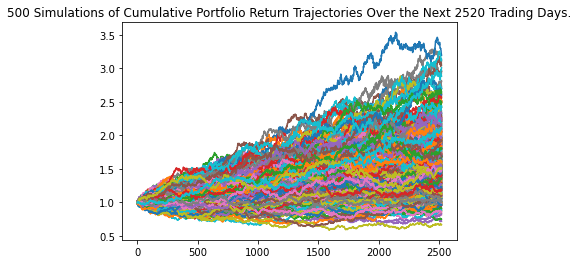

In [37]:
# Plot simulation outcomes
# YOUR CODE HERE!
plot_3 = Monte_early_ten.plot_simulation()

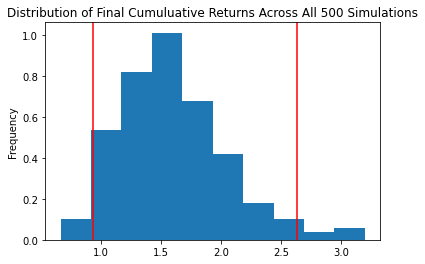

In [38]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_3 = Monte_early_ten.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_table3 = Monte_early_ten.summarize_cumulative_return()

sim_return_data_3 = { 
    'mean': list(Monte_early_ten.simulated_return.mean(axis=1)),
    'median': list(Monte_early_ten.simulated_return.median(axis=1)),
    'min': list(Monte_early_ten.simulated_return.min(axis=1)),
    'max': list(Monte_early_ten.simulated_return.max(axis=1))}
# Print summary statistics
# YOUR CODE HERE!
sim_return_2_df = pd.DataFrame(sim_return_data_3)

print(sum_table3)

count           500.000000
mean              1.595521
std               0.443494
min               0.667828
25%               1.287425
50%               1.533050
75%               1.863595
max               3.195808
95% CI Lower      0.934589
95% CI Upper      2.634896
Name: 2520, dtype: float64


In [40]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_ten = round(sum_table3[8]*60000,2)
ci_lower_ten = round(sum_table3[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $158093.77 and $56075.32
